# Multi-layer Perceptron (MLP)

คือ อัลกอริทึมการเรียนรู้แบบมีผู้สอน ที่เรียนรู้ฟังก์ชัน $f(\cdot): R^m -> R^o$ จาก training dataset (X, y) เมื่อ X คืออินพุทที่ประกอบด้วยฟีเจอร์จำนวน $m$ ฟีเจอร์  และ $y$ คือค่าเวคเตอร์เป้าหมายที่มีขนาด $o$ มิติ 

`MLP` สามารถเรียนรู้ฟังก์ชันแบบไม่เชิงเส้นใดๆ และใช้ได้ทั้งกับการทำนายค่า (regression) และการจำแนกประเภท (classification) `MLP` แตกต่างจาก `logistic regression` ตรงที่ `MLP` ประกอบด้วยหน่วยประมวลผลหลายโหนด ที่เชื่อมโยงกันเป็นชั้น (layered architecture) โดยระหว่างชั้นอินพุทและเอาท์พุทสามารถมีชั้นแฝง (hidden layers) ที่ประกอบด้วยหน่วยประมวลผลหรือนิวรอนแบบไม่เชิงเส้น ได้ตั้งแต่หนึ่งชั้นขึ้นไป ดังตัวอย่าง `MLP` ที่ประกอบด้วย hidden layer จำนวน 1 เลเยอร์ ในรูปที่ 1


<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="480"/>

**<center>รูปที่ 1: One hidden layer MLP. (ภาพจาก https://scikit-learn.org/stable/modules/neural_networks_supervised.html)</center>**

จากรูปที่ 1 เลเยอร์ทางด้านซ้ายสุดคือ `input layer` ประกอบด้วยเซตของนิวรอน $\{x_i | x_1, x_2, ..., x_m\}$ แต่ละนิวรอนใน `hidden layer` ทำหน้าที่แปลงสัญญาณอินพุทที่ได้รับจากเลเยอร์ก่อนหน้าโดยใช้การรวมค่าเชิงเส้นแบบถ่วงน้ำหนัก `weighted linear summation` $w_1 x_1 + w_2 x_2 + ... + w_m x_m$ ตามด้วยฟังก์ชันแบบไม่เชิงเส้น `activation function` $g(\cdot): R \rightarrow R$ เช่น sigmoid function, hyperbolic tan function, relu function ส่วนเลเยอร์ทางด้านขวาสุดคือ `output layer` ซึ่งจะรับค่าจาก `hidden layer` สุดท้ายและแปลงค่าดังกล่าวเป็นค่าเอาท์พุท

## Classification

เราจะทดลองสร้าง `MLP classifier` สำหรับจำแนกประเภทดอกไอริส ด้วยชุดข้อมูล Iris dataset

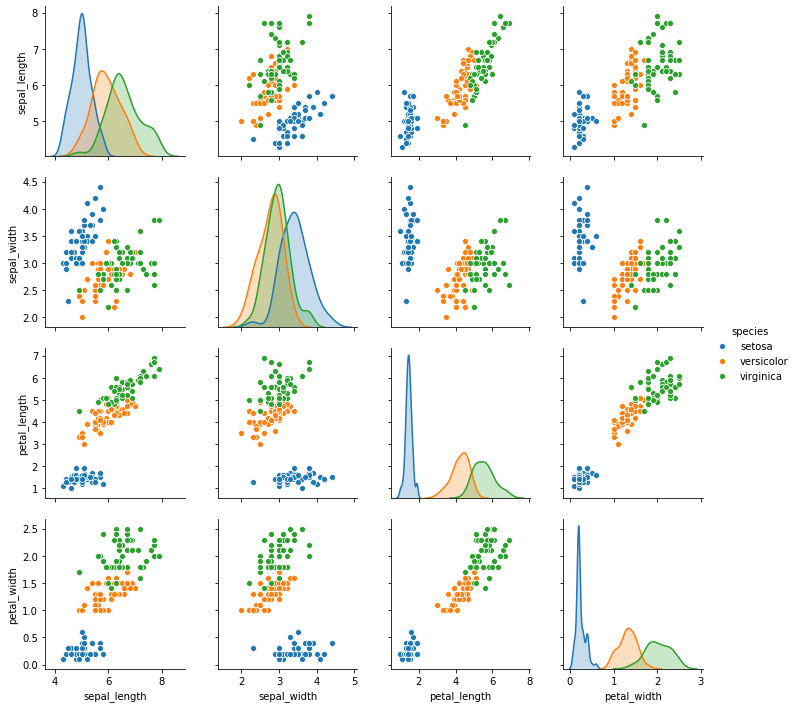

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

1. โหลดข้อมูล iris dataset และเตรียมข้อมูลโดยการแบ่งข้อมูลออกเป็น training set  และ test set จากนั้นแปลงค่าอินพุทให้อยู่ในช่วงค่ามาตรฐาน และแปลงค่าเอาท์พุทให้อยู่ในรูปของ `one-hot vector` 

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(len(iris.target_names)))
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

2. สร้างโมเดล Multi-layer Perceptron

In [3]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
        hidden_layer_sizes=(4,), 
        activation='relu',
        solver='lbfgs',
        alpha=1e-5,
        random_state=42)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

3. ประเมินประสิทธิภาพ

In [4]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

4. ทำนายค่า

In [5]:
import numpy as np

flower = 7
predict = clf.predict([X_test[flower]])
print("Prediction: {0}".format(iris.target_names[np.argmax(predict)]))
print("Truth: {0}".format(iris.target_names[np.argmax(y_test[flower])]))

Prediction: virginica
Truth: virginica


## Regression

เราจะทดลองสร้าง `MLP regressor` สำหรับทำนายราคาบ้าน ด้วยชุดข้อมูล Boston Housing Price

In [6]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['HOUSEPRICE'] = boston_dataset.target  # median value of house price in $1000

print(boston_dataset.DESCR)
print("Number of null values for each feature:")
print(boston.isnull().sum())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(14.0, 0.0)

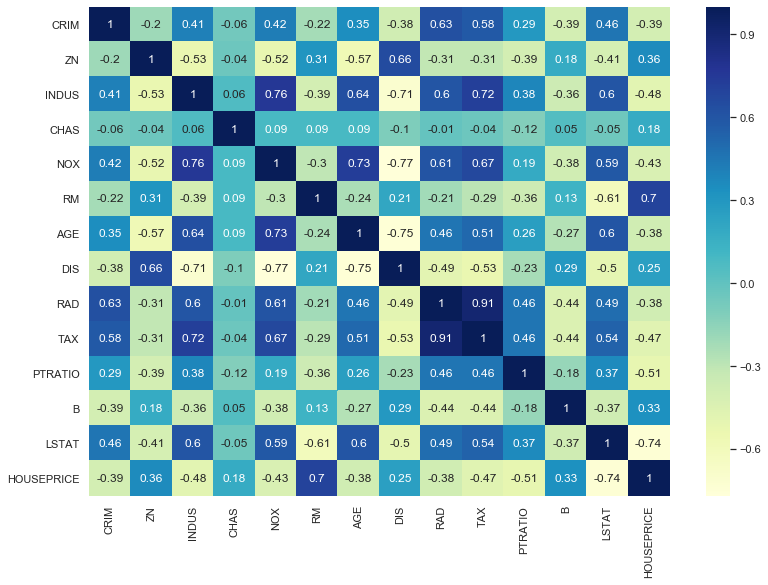

In [7]:
# show Correlation Matrix
sns.set(rc={'figure.figsize':(13, 9)})
correlation_matrix = boston.corr().round(2)
ax = sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)

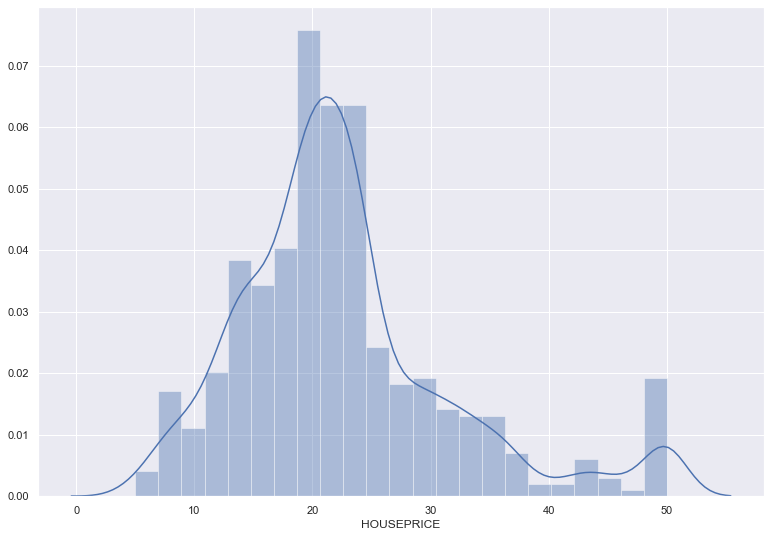

In [8]:
# show distribution of the target value
sns.set(rc={'figure.figsize':(13, 9)})
sns.distplot(boston['HOUSEPRICE'])

1. โหลดข้อมูล Boston house prices

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

2. สร้างโมเดล Multi-layer Perceptron

In [10]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='logistic',
        solver='sgd',
        alpha=1e-3,
        batch_size=36,
        learning_rate_init=1e-3,
        random_state=42
        )

clf.fit(X_train, y_train)

/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.001, batch_size=36, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

3. ประเมินประสิทธิภาพ

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = clf.predict(X_test)
print("MSE = ", mean_squared_error(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))    

MSE =  8.807707331701915
MAE =  2.103057705565392


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

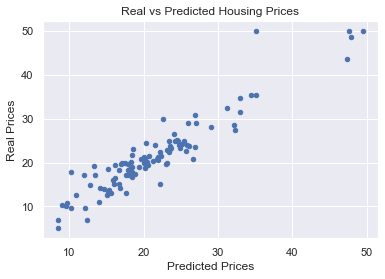

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred, y_test, s=20)
plt.xlabel('Predicted Prices')
plt.ylabel('Real Prices')
plt.title('Real vs Predicted Housing Prices')